# Métodos para encontrar raízes #


Neste Notebook, vamos implementar os métodos de encotrar raízes vistos nas últimas aulas. Além disto, faremos experimentos para medir a __quanto tempo__ cada método está levando com a biblioteca timeit



Para começar, reaproveite seu método da bissecção e o adicione abaixo. Implemente também o método das secantes: 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math

In [85]:
def bisseccao(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    i=0
    raiz=(a+b)/2 # ((-30+(-1))/2) 
    while(i<niter and ((b-a)>proximidadeIter) and (f(raiz)>minimo or f(raiz)<0)):
        if(f(a)*f(raiz)<0):
            b = raiz
        elif(f(b)*f(raiz)<0):
            a = raiz
        raiz = (a+b)/2
        i+=1
    return raiz,i



In [86]:
def secantes(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    i=0
    x=b-f(b)/(f(b)-f(a))*(b-a)
    while(i<niter and ((x-b)>proximidadeIter or (x-b)<0) and (f(x)>minimo or f(x)<0)):
        a=b
        b=x
        x=b-f(b)/(f(b)-f(a))*(b-a)
        i = i+1
    return x,niter

Para verificar que seu método está funcionando de fato, faça uma versão com gráficos. Faça a bissecção plotar um gráfico com a função, as três primeiras tentativas de raiz e a última. Faça a mesma coisa para o método das secantes, plotando as três primeiras retas geradas e o ponto final. Teste seu método na função $x^{2}sen(2)$ no intervalo de 2.1 a 4.2

In [87]:
def func(x):
    return (x**2)*np.sin(x)

In [88]:
def bisseccaog(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    x = np.linspace(-7,7,1000)
    y = f(x)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.xticks(np.linspace(-10,10,11))
    plt.yticks(np.linspace(-50,50,11))
    plt.xlim(-10,10)
    plt.ylim(-50,50)
    plt.axhline(0, color='black',linewidth=1)
    plt.grid(1)
    
    i=0
    raiz=(a+b)/2 # ((-30+(-1))/2)
    t = []
    while(i<niter  and (f(raiz)>minimo or f(raiz)<0) and ((b-a)>proximidadeIter)):
        if(f(a)*f(raiz)<0):
            b = raiz
        else:
            a = raiz
        raiz = (a+b)/2
        if i < 3:
            t.append(raiz)
        i+=1
    
    plt.scatter(t[0],[0], 60, color ='yellow', label="1º Tentativa")
    plt.scatter(t[1],[0], 50, color ='green',label="2º Tentativa")
    plt.scatter(t[2],[0], 40, color ='red', label="3º Tentativa")
    plt.scatter(raiz,[0], 35, color ='blue',label="Raiz")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.plot(x, y)
    plt.show()
    return raiz,i




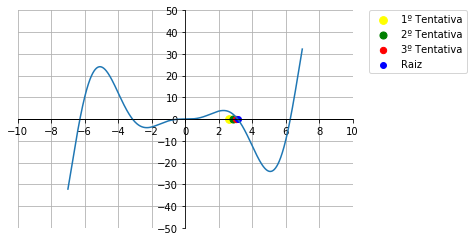

(3.1415925979614263, 18)

In [89]:
bisseccaog(func,2.1,4.2)

In [96]:
def secantesg(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    x = np.linspace(-7,7,1000)
    y = f(x)
        
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.xticks(np.linspace(-10,10,11))
    plt.yticks(np.linspace(-50,50,11))
    plt.xlim(-10,10)
    plt.ylim(-50,50)
    plt.axhline(0, color='black',linewidth=1)
    plt.grid(1)
    
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(8)
    
    plt.plot(x,y,"b-")
    plt.grid(1)
    
    i=0
    x=b-f(b)/(f(b)-f(a))*(b-a)
    plt.scatter([a,b],[f(a),f(b)], 50, color ='black')
    plt.plot([a,b],[f(a),f(b)],"k--",label="1º Tentativa")
    
    ta = np.array([0.,0.])
    tb = np.array([0.,0.])
    while(i<niter and ((x-b)>proximidadeIter or (x-b)<0) and (f(x)>minimo or f(x)<0)):
        a=b
        b=x
        if(i<2):
            ta[i] = a
            tb[i] = b
        x=b-f(b)/(f(b)-f(a))*(b-a)
        i = i+1
    
    plt.scatter([ta[0],tb[0]],[f(ta[0]),f(tb[0])],50,color="y")
    plt.plot([ta[0],tb[0]],[f(ta[0]),f(tb[0])],"y--",label="2º Tentativa")
    
    plt.scatter([ta[1],tb[1]],[f(ta[1]),f(tb[1])],50,color="r")
    plt.plot([ta[1],tb[1]],[f(ta[1]),f(tb[1])],"r--",label="3º Tentativa")

    plt.scatter(x,[0], 50, color ='b',label="Raiz")        
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    return x,i


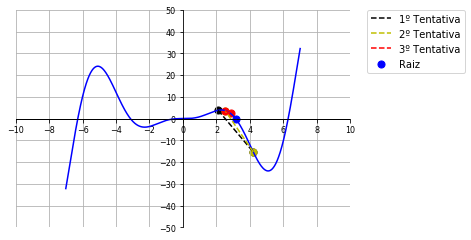

(3.141592653286708, 7)

In [97]:
secantesg(func,2.1,4.2)

In [98]:
def func(x):
    return (x**2)*np.sin(x)

def funcD(x):
    return (2*x*np.sin(x))+((x**2)*np.cos(x))

In [99]:
def falsi(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    i=0
    x=b-f(b)/(f(b)-f(a))*(b-a)
    while(i<niter and (f(x)>minimo or f(x)<0) and x-b<proximidadeIter):
        if(f(a)*f(x)<0):
            b=x
        else:
            a=x
        x=b-f(b)/(f(b)-f(a))*(b-a)
        i = i+1
        
    return x,i


In [100]:
falsi(func,2.1,4.2)

(3.1415926038540065, 15)

Faça agora o mesmo para o Regula Falsi:

In [101]:
def falsig(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    x = np.linspace(-7,7,1000)
    y = f(x)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    plt.xticks(np.linspace(-10,10,11))
    plt.yticks(np.linspace(-50,50,11))
    plt.xlim(-10,10)
    plt.ylim(-50,50)
    plt.axhline(0, color='black',linewidth=1)
    plt.grid(1)
    
    plt.plot(x,y,"b-")
    plt.grid(1)

    ta = np.array([0.,0.])
    tb = np.array([0.,0.])    
    
    i=0
    x=b-f(b)/(f(b)-f(a))*(b-a)
    
    plt.scatter([a,b],[f(a),f(b)], 50, color ='black')
    plt.plot([a,b],[f(a),f(b)],"k--",label="1º Tentativa")
    
    while(i<niter and (f(x)>minimo or f(x)<0) and x-b<proximidadeIter):
        if(f(a)*f(x)<0):
            b=x
        else:
            a=x
        if(i<2):
            ta[i] = a
            tb[i] = b
        x=b-f(b)/(f(b)-f(a))*(b-a)
        i = i+1
        
    plt.scatter([ta[0],tb[0]],[f(ta[0]),f(tb[0])],50,color="y")
    plt.plot([ta[0],tb[0]],[f(ta[0]),f(tb[0])],"y--",label="2º Tentativa")
    
    plt.scatter([ta[1],tb[1]],[f(ta[1]),f(tb[1])],50,color="r")
    plt.plot([ta[1],tb[1]],[f(ta[1]),f(tb[1])],"r--",label="3º Tentativa")        
        
    plt.scatter(x,[0], 50, color ='b',label="Raiz")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    plt.show()
    return x,i 

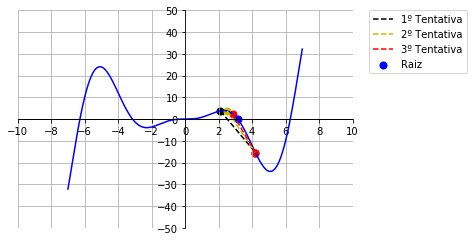

(3.1415926038540065, 15)

In [102]:
#falsi(func,2.1,4.2)
falsig(func, 2.1, 4.2)

### Método de Newton ###

O método de newton é ligeiramente diferente. Ele precisa apenas de um ponto para fazer achar a nova tentativa de raiz, ao invés de um intervalo. Um exemplo gráfico do funcionamento dele:

https://commons.wikimedia.org/wiki/File:NewtonIteration_Ani.gif

Em contrapartida, o método de Newton precisa de um argumento extra: A derivada da função que se deseja achar a a raiz.

Implemente as duas versões do método de newton, com e sem gráficos:

In [103]:
def func(x):
    return (x**2)*np.sin(x)

def funcD(x):
    return (2*x*np.sin(x))+((x**2)*np.cos(x))

In [104]:
def newton(f,fd,x, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    raiz = x - (f(x)/fd(x))
    xant = 0
    i = 0
    while(i<niter and (f(raiz)>minimo or f(raiz)<0) and raiz-xant>proximidadeIter):
        xant = raiz
        raiz = raiz - (f(raiz)/fd(raiz))
        i+=1
    return raiz,i



In [105]:
newton(func,funcD,1)

(0.4047911206787485, 1)

In [106]:
def newtong(f,fd,raiz, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    
    x = np.linspace(-7,7,1000)
    y = f(x)
    
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position(('data',0))
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    
    plt.xticks(np.linspace(-10,10,11))
    plt.yticks(np.linspace(-50,50,11))
    plt.xlim(-10,10)
    plt.ylim(-50,50)

    
    plt.plot(x,y,"b-")
    plt.grid(1)    
    
    raiz = raiz - (f(raiz)/fd(raiz))
    xant = 0
    i = 0
    while(i<niter and (f(raiz)>minimo or f(raiz)<0) and raiz-xant>proximidadeIter):
        xant = raiz
        raiz = raiz - (f(raiz)/fd(raiz))
        i+=1
    
    plt.scatter(raiz,[0], 50, color ='blue',label="Raiz")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    return raiz,i


Teste o método de Newton e o Regula Falsi com a função $x^{x}sen(x)$ no intervalo de 2.1 a 4.2 (escolha qualquer um dos dois pontos para Newton:

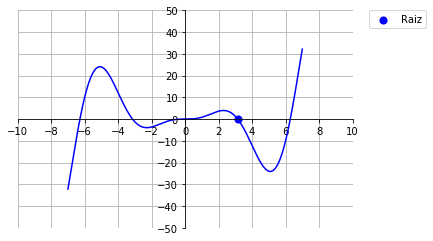

(3.1466692027762133, 1)

In [107]:
newtong(func,funcD,4.2)

Com todos os métodos implementados, vamos agora ver qual é o melhor em cada cenário. Para isto, vamos ver, além da raiz gerada e do número de iterações, o tempo levado para encontrar a raiz. Para isto, usaremos a biblioteca timeit

In [108]:
def f(x):
    return x^2

#%timeit -n10000000 f(10)

Como você pode ver, demorou um pouquinho né? Isso porque aquele parametro -n está dizendo para o timeit quantas vezes ele deve rodar o comando f(10), e mostra a média e o desvio padrão de 7 rodadas de 10000000 repetições.


Agora, vamos ao exercício: __você deve encontrar um intervalo onde há uma raiz__ (seja plotando ou usando lagrange), rodar e verificar o tempo de execução, distância da raiz achada de 0 e o número de iterações da bissecção, secantes, regula falsi e Newton para as seguintes funções:

1: $f_1(x) = 2x^4 + 4x^3 + 3x^2-10x-15$

2: $f_2(x) = x^5-2x^4-9x^3+22x^2+4x-24$  

3: $f_3(x) = 5x^3+x^2-e^{1-2x}+cos(x)+20$

4: $f_4(x) = sen(x)x+4$

5: $f_5(x) = (x-3)^5ln(x)$

Entrega: Quinta-Feira, 24/4 via Colabweb

1: $f_1(x) = 2x^4 + 4x^3 + 3x^2-10x-15$

In [109]:
def func1(x):
    return 2*(x**4)+4*(x**3)+3*(x**2)-10*x-15
def func1d(x):
    return 8*(x**3)+12*(x**2)-10

Bisseccão:


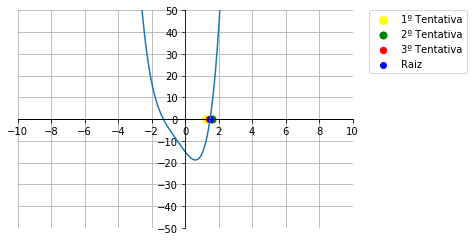

The slowest run took 5.22 times longer than the fastest. This could mean that an intermediate result is being cached.
424 µs ± 305 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Secantes:


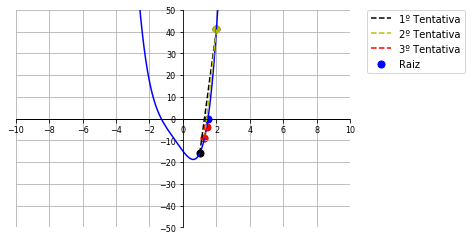

The slowest run took 5.69 times longer than the fastest. This could mean that an intermediate result is being cached.
139 µs ± 128 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Regula Falsi:


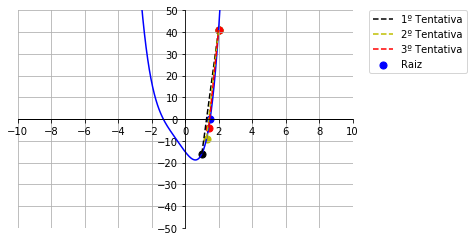

1 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Newton:


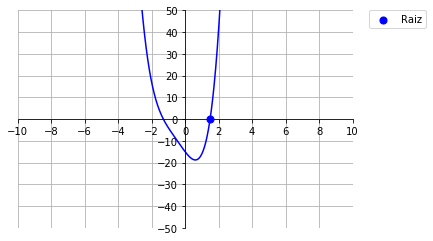

15.2 µs ± 3.65 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [110]:
print("Bisseccão:")
bisseccaog(func1,-1,2)
%timeit -n10 bisseccao(func1,1,2)

print("Secantes:")
secantesg(func1,1,2)
%timeit -n10 secantes(func1,1,2)

print("Regula Falsi:")
falsig(func1,1,2)
%timeit -n10 falsi(func1,1,2)

print("Newton:")
newtong(func1,func1d,1.49)
%timeit -n10 newton(func1,func1d,1.49)

2: $f_2(x) = x^5-2x^4-9x^3+22x^2+4x-24$ 

In [111]:
def func2(x):
    return (x**5)-2*(x**4)-9*(x**3)+22*(x**2)+4*x-24

def d2(x):
    return 5*(x**4)-8*(x**3)-27*(x**2)+44*x+4

Bisseccão:


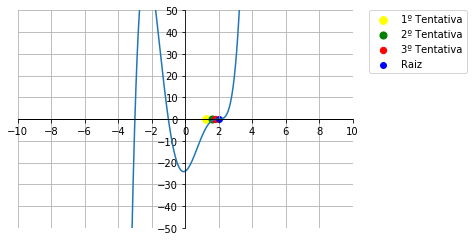

39 ms ± 6.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Secantes:



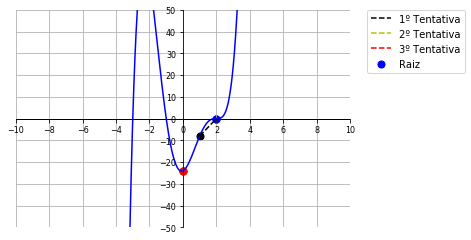

15.5 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Regula Falsi:



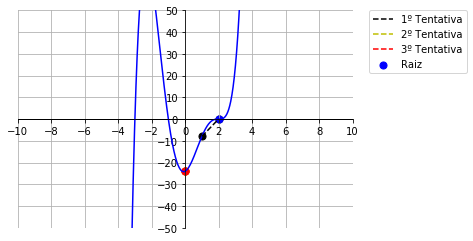

19.8 µs ± 415 ns per loop (mean ± std. dev. of 7 runs, 10 loops each)
Newton:



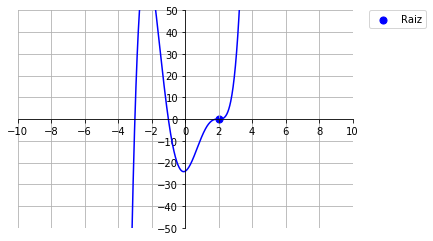

The slowest run took 4.08 times longer than the fastest. This could mean that an intermediate result is being cached.
538 µs ± 329 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [112]:
print("Bisseccão:")
bisseccaog(func2,-1,2)
%timeit -n10 bisseccao(func2,1,2)

print("Secantes:\n")
secantesg(func2,1,2)
%timeit -n10 secantes(func2,1,2)

print("Regula Falsi:\n")
falsig(func2,1,2)
%timeit -n10 falsi(func2,1,2)

print("Newton:\n")
newtong(func2,d2,1)
%timeit -n10 newton(func2,d2,1)

3: $f_3(x) = 5x^3+x^2-e^{1-2x}+cos(x)+20$

In [113]:
def func3(x):
    return 5*(x**3)+(x**2)-np.exp(1-2*x)+np.cos(x)+20
def func3d(x):
    return 15*(x**2)+2*x+2*np.exp(1-2*x)-np.sin(x)
    

Bisseccão:


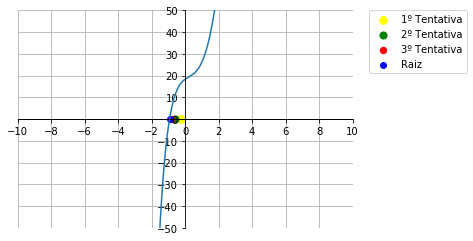

125 ms ± 9.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Secantes:


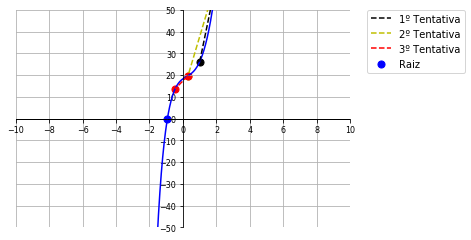

1.45 ms ± 948 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Regula Falsi:


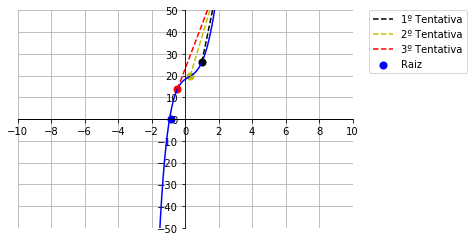

669 µs ± 302 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Newton:


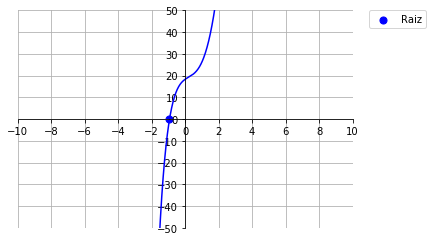

83.4 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [114]:
print("Bisseccão:")
bisseccaog(func3,-1,2)
%timeit -n10 bisseccao(func3,1,2)

print("Secantes:")
secantesg(func3,1,2)
%timeit -n10 secantes(func3,1,2)

print("Regula Falsi:")
falsig(func3,1,2)
%timeit -n10 falsi(func3,1,2)

print("Newton:")
newtong(func3,func3d,-1)
%timeit -n10 newton(func3,func3d,-1)

4: $f_4(x) = sen(x)x+4$

In [115]:
def func4(x):
    return np.sin(x)*x+4

def d4(x):
    return x*(np.cos(x))+ np.sin(x)

Bisseccão:


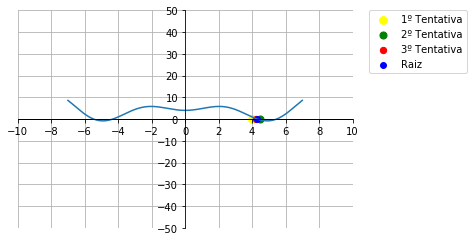

55.4 ms ± 3.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Secantes:


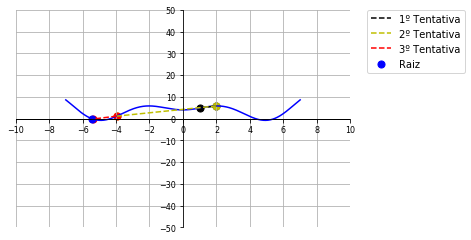

535 µs ± 170 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Regula Falsi:


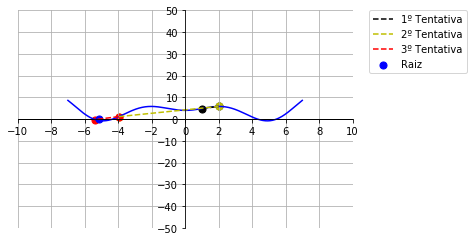

168 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Newton:


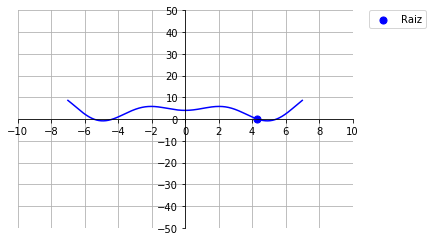

185 µs ± 78 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [116]:
print("Bisseccão:")
bisseccaog(func4,1,5)
%timeit -n10 bisseccao(func4,1,2)

print("Secantes:")
secantesg(func4,1,2)
%timeit -n10 secantes(func4,1,2)

print("Regula Falsi:")
falsig(func4,1,2)
%timeit -n10 falsi(func4,1,2)

print("Newton:")
newtong(func4,d4,4)
%timeit -n10 newton(func4,d4,4)

5: $f_5(x) = (x-3)^5ln(x)$


In [117]:
def func5(x):
    return (x-3)^5*np.log(x)
def func5d(x):
    return 5*np.log(x)*((x-3)**4)+(((x-3)**5)/x)

Bisseccão:


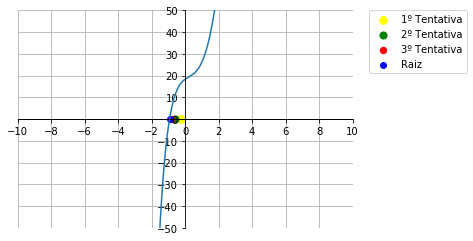

120 ms ± 5.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Secantes:


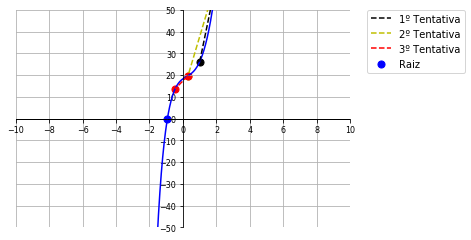

1.64 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Regula Falsi:


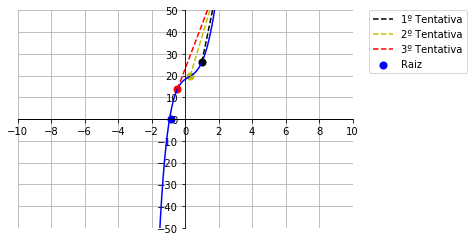

1.2 ms ± 548 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Newton:


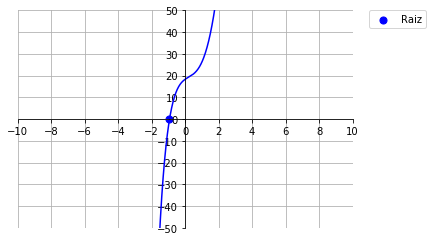

The slowest run took 4.94 times longer than the fastest. This could mean that an intermediate result is being cached.
185 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [118]:
print("Bisseccão:")
bisseccaog(func3,-1,2)
%timeit -n10 bisseccao(func3,1,2)

print("Secantes:")
secantesg(func3,1,2)
%timeit -n10 secantes(func3,1,2)

print("Regula Falsi:")
falsig(func3,1,2)
%timeit -n10 falsi(func3,1,2)

print("Newton:")
newtong(func3,func3d,-1)
%timeit -n10 newton(func3,func3d,-1)